# Applied

## Problem 8
In this exercise, we will generate simulated data, and will then use this data to perform best subset seleciton.  
&nbsp;&nbsp;(a) Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector $\epsilon$ of length $n = 100$.  
&nbsp;&nbsp;(b) Generate a response vector $Y$ of length $n = 100$ according to the model
\begin{align}
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
\end{align}
where $\beta_0, \beta_1, \beta_2,$ and $\beta_3$ are constants of your choice.
&nbsp;&nbsp;(c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2,\ldots,X^{10}$. What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.  
&nbsp;&nbsp;(d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?  
&nbsp;&nbsp;(e) Now fit a lasso model to the simulated data, again using $X, X^2,\ldots,X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained.  
&nbsp;&nbsp;(f) Now generate a response vector $Y$ according to the model
\begin{align}
Y = \beta_0 + \beta_7 X^7 + \epsilon
\end{align}
and perform best subset selection and the lasso. Discuss the results obtained.  

__SOLUTION__

In [1]:
cat("(a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector e of length n = 100: \n")
set.seed(1)
x <- rnorm(100)
eps <- rnorm(100)

(a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector e of length n = 100: 


In [2]:
cat("(b) Generate a response vector Y\n")
b0 <- 2
b1 <- 3
b2 <- -1
b3 <- 0.5
y <- b0 + b1 * x + b2 * x^2 + b3* x^3 + eps

(b) Generate a response vector Y


(c) perform best subset selection


Loading required package: leaps



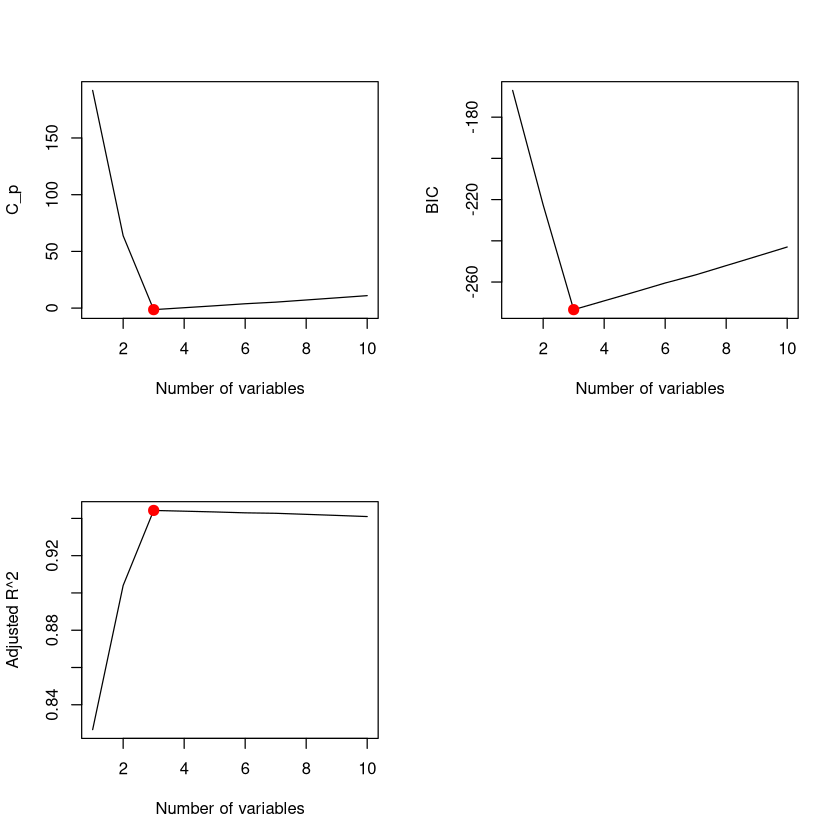

In [3]:
cat("(c) perform best subset selection\n")
require(leaps)
data.full <- data.frame(y = y, x = x)
regfit.full <- regsubsets(y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6) + I(x^7) + I(x^8) + I(x^9) + I(x^10), data = data.full, nvmax = 10)
reg.summary <- summary(regfit.full)
par(mfrow = c(2, 2))
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex = 2, pch = 20)

We find that, with $C_p$ we pick the 3-variables model, with BIC we pick the 3-variables model, and with adjusted $R^2$ we pick the 3-variables model.

In [4]:
coef(regfit.full, which.max(reg.summary$adjr2))

(Intercept)           x      I(x^2)      I(x^5) 
 2.07219472  3.44514720 -1.15676236  0.09022577

(d) forward stepwise and backward stepwise


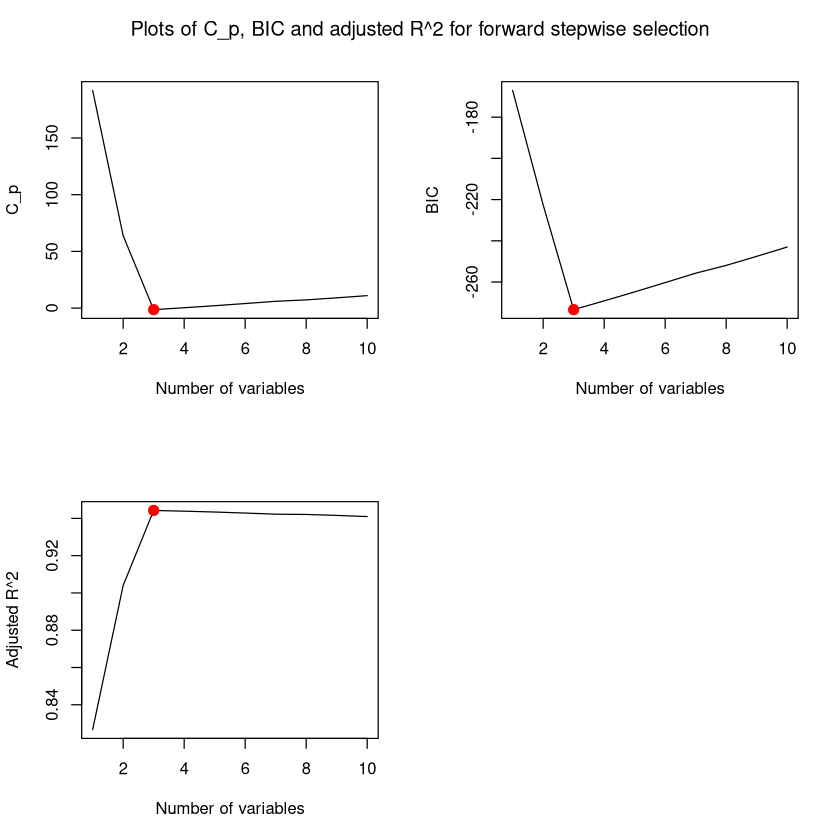

In [5]:
cat("(d) forward stepwise and backward stepwise\n")
regfit.fwd <- regsubsets(y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6) + I(x^7) + I(x^8) + I(x^9) + I(x^10), data = data.full, nvmax = 10, method = "forward")
reg.summary.fwd <- summary(regfit.fwd)
par(mfrow = c(2,2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
mtext("Plots of C_p, BIC and adjusted R^2 for forward stepwise selection", side = 3, line = -2, outer = TRUE)

We find that, for forward stepwise seleciton, with $C_p$ we pick the 3-variables model, with BIC we pick the 3-variables model, and with adjusted $R^2$ we pick the 3-variables model.

In [6]:
coef(regfit.fwd, which.max(reg.summary.fwd$adjr2))

(Intercept)           x      I(x^2)      I(x^5) 
 2.07219472  3.44514720 -1.15676236  0.09022577

(e) Fit a lasso model


Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.1-8



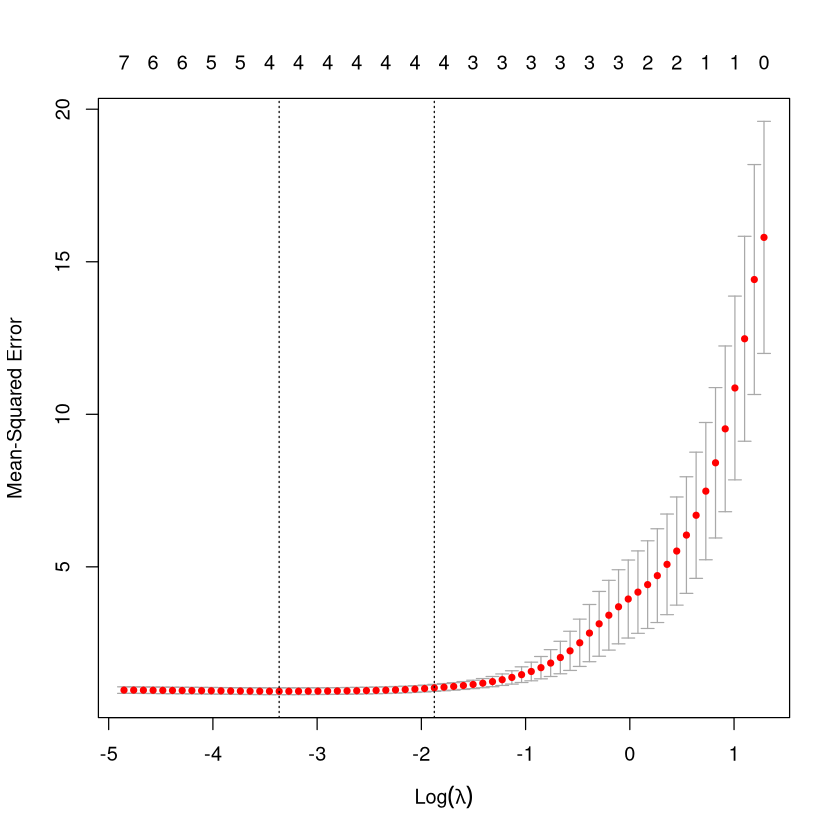

In [7]:
cat("(e) Fit a lasso model\n")
require(glmnet)
xmat <- model.matrix(y ~ x + I(x^2) + I(x^3) + I(x^4) + I(x^5) + I(x^6) + I(x^7) + I(x^8) + I(x^9) + I(x^10), data = data.full)[, -1]
cv.lasso <- cv.glmnet(xmat, y, alpha = 1)
plot(cv.lasso)

In [8]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.03458424

Now we refit our lasso model using the value $\lambda = 0.0379562$ chosen by cross-validation.

In [9]:
fit.lasso <- glmnet(xmat, y, alpha=1)
predict(fit.lasso, s = bestlam, type = "coefficients")[1:11,]

(Intercept)           x      I(x^2)      I(x^3)      I(x^4)      I(x^5) 
 2.04367894  3.29157840 -1.11065890  0.13441562  0.00000000  0.06526751 
     I(x^6)      I(x^7)      I(x^8)      I(x^9)     I(x^10) 
 0.00000000  0.00000000  0.00000000  0.00000000  0.00000000

The lasso method picks $X, X^2, X^3$ and $X^5$ as variables for the model.

---

## Problem 9
In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

### Part A
Split the data set into a training set and a test set.

In [10]:
library(ISLR2)

In [11]:
set.seed(11)
train <- sample(c(TRUE, FALSE), nrow(College), replace = TRUE)
test <- (!train)

### Part B
Fit a linear model using least squares on the trainig set, and report the test error obtained.

In [12]:
lm.fit <- lm(Apps ~ ., data=College[train,])
lm.pred <- predict(lm.fit, College[test,])
mean((lm.pred - College[test,]$Apps)^2)

[1] 1512942

### Part C
Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [13]:
require(glmnet)

In [14]:
set.seed(11)
x <- model.matrix(Apps ~ ., College)[,-1]
y <- College$Apps
grid <- 10^seq(4, -2, length = 100)

[1] 28.48036

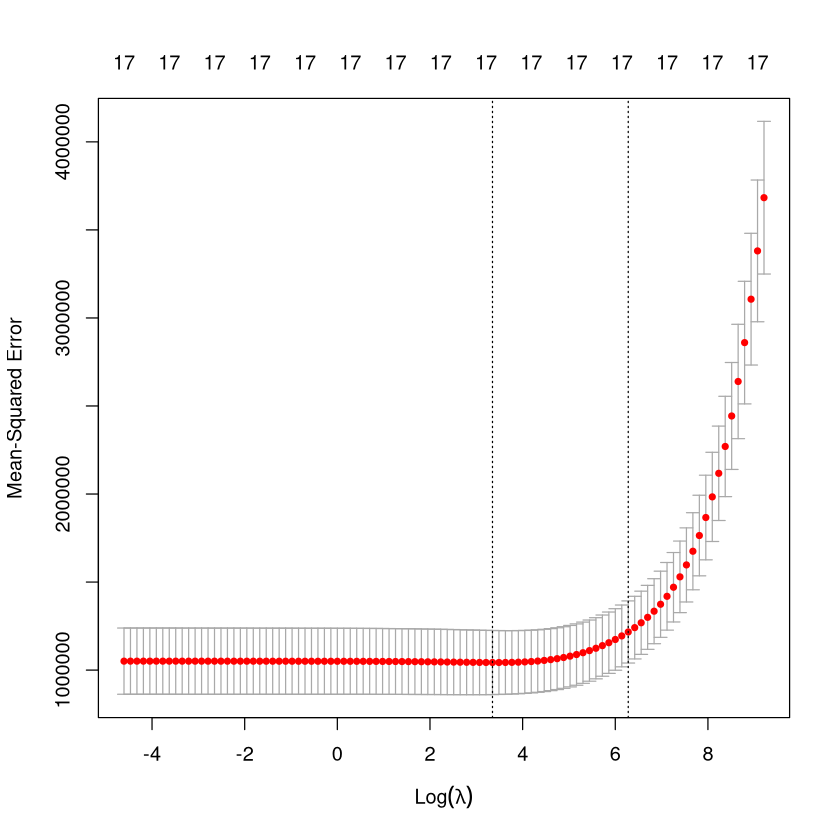

In [15]:
cv.ridge <- cv.glmnet(x[train,], y[train], alpha = 0, lambda = grid)
plot(cv.ridge)
bestlam <- cv.ridge$lambda.min
bestlam

In [16]:
ridge.mod <- glmnet(x[train,], y[train], alpha = 0, lambda = bestlam)
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test,])
mean((ridge.pred  - y[test])^2)

[1] 1630462

In [17]:
ridge <- glmnet(x, y, alpha = 0)
predict(ridge, type = "coefficients", s = bestlam)

18 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -1.468326e+03
PrivateYes  -5.278781e+02
Accept       1.004588e+00
Enroll       4.313442e-01
Top10perc    2.580619e+01
Top25perc    5.501092e-01
F.Undergrad  7.258520e-02
P.Undergrad  2.420595e-02
Outstate    -2.407454e-02
Room.Board   1.987732e-01
Books        1.285477e-01
Personal    -8.146130e-03
PhD         -4.028284e+00
Terminal    -4.811071e+00
S.F.Ratio    1.302180e+01
perc.alumni -8.544783e+00
Expend       7.589013e-02
Grad.Rate    1.126699e+01

### Part D
Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

[1] 10.72267

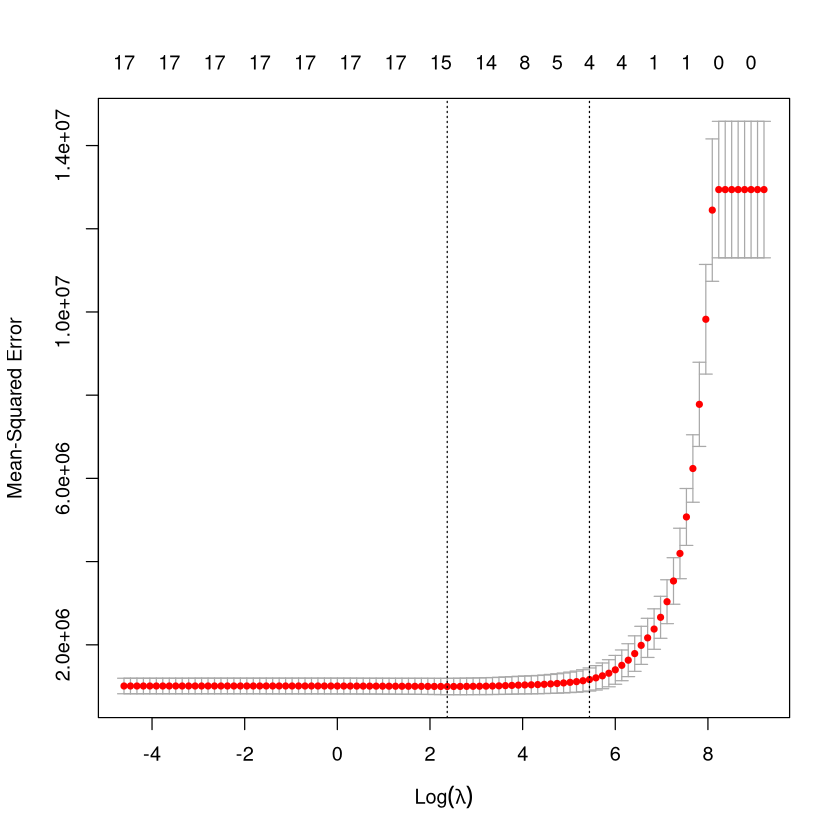

In [18]:
cv.lasso <- cv.glmnet(x[train,], y[train], alpha = 1, lambda = grid)
plot(cv.lasso)
bestlam <- cv.lasso$lambda.min
bestlam

In [19]:
lasso.mod <- glmnet(x[train,], y[train], alpha = 1, lambda = bestlam)
lasso.pred <- predict(ridge.mod, s = bestlam, newx = x[test,])
mean((lasso.pred - y[test])^2)

[1] 1630462

In [20]:
lasso <- glmnet(x, y, alpha = 1, lambda = bestlam)
predict(lasso, type = "coefficients", s = bestlam)

18 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -533.60532202
PrivateYes  -474.81129786
Accept         1.52001966
Enroll        -0.40954681
Top10perc     41.81243724
Top25perc     -8.08898043
F.Undergrad    .         
P.Undergrad    0.03988155
Outstate      -0.07322712
Room.Board     0.13969182
Books          .         
Personal       0.01850298
PhD           -7.25967099
Terminal      -3.03087839
S.F.Ratio     10.53530414
perc.alumni   -0.58564737
Expend         0.07379691
Grad.Rate      6.84852630

### Part E
Fit a PCR model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [21]:
require(pls)
set.seed(2)
pcr.fit <- pcr(Apps ~ ., data = College, scale = TRUE, validation = "CV")
summary(pcr.fit)

Loading required package: pls


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




Data: 	X dimension: 777 17 
	Y dimension: 777 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3873     3831     2030     2037     1720     1595     1594
adjCV         3873     3831     2028     2037     1688     1586     1590
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1583     1548     1507      1508      1516      1516      1520
adjCV     1584     1543     1503      1505      1512      1512      1516
       14 comps  15 comps  16 comps  17 comps
CV         1523      1416      1169      1146
adjCV      1519      1403      1163      1139

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.670    57.30    64.30    69.90    75.39    80.38    83.99    87.40
Apps    2.316    73.06    73.07    82.08    84.08    84.11    84.32    85.1

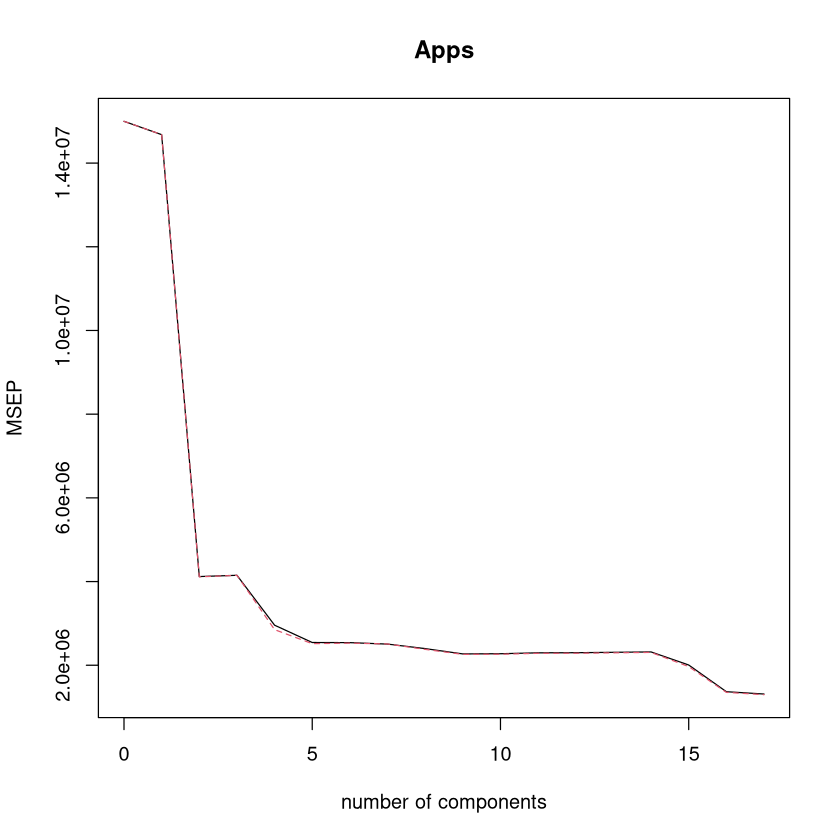

In [22]:
validationplot(pcr.fit, val.type = "MSEP")

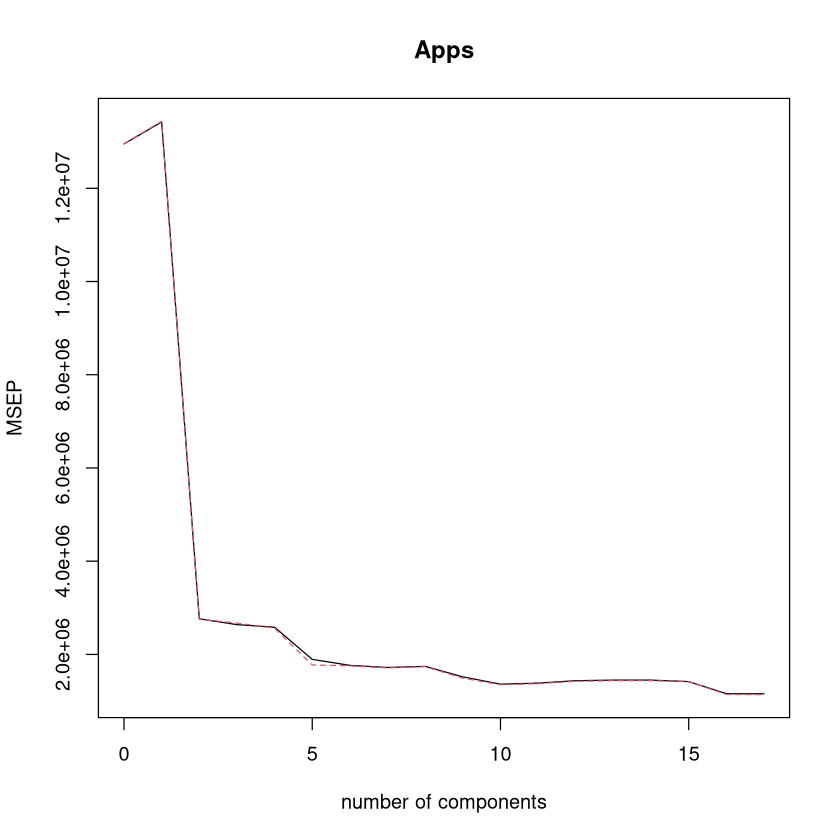

In [23]:
set.seed(1)
pcr.fit <- pcr(Apps ~ ., data = College, subset = train, scale = TRUE, validation = "CV")
validationplot(pcr.fit, val.type = "MSEP")

In [25]:
pcr.pred <- predict(pcr.fit, x[test,], ncomp = 5)
mean((pcr.pred - y[test])^2)

[1] 3868160

In [26]:
pcr.fit <- pcr(y ~ x, scale = TRUE, ncomp = 5)
summary(pcr.fit)

Data: 	X dimension: 777 17 
	Y dimension: 777 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X   31.670    57.30    64.30    69.90    75.39
y    2.316    73.06    73.07    82.08    84.08


---

### Part F
Fit a PLS model on the training set, with $M$ chosen by cross-validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

In [27]:
set.seed(1)
pls.fit <- plsr(Apps ~ ., data = College, subset = train, scale = TRUE, validation = "CV")
summary(pls.fit)

Data: 	X dimension: 390 17 
	Y dimension: 390 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            3599     1527     1147     1172     1136     1125     1107
adjCV         3599     1522     1127     1167     1130     1116     1095
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1086     1073     1066      1072      1083      1078      1076
adjCV     1077     1066     1059      1063      1074      1069      1067
       14 comps  15 comps  16 comps  17 comps
CV         1075      1075      1075      1075
adjCV      1066      1066      1066      1066

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       26.02    34.05    62.16    66.16    70.27    72.65    76.94    80.87
Apps    83.31    90.04    90.74    91.68    92.36    93.11    93.17    

In [30]:
pls.pred <- predict(pls.fit, x[test,], ncomp = 1)
mean((pls.pred - y[test])^2)

[1] 4793608

---

## Problem 10

### Part A
Generate a data set with $p=20$ features, $n=1,000$ observations and an associated quantitative response vector generated according to the model
\begin{align}
Y = X \beta + \epsilon
\end{align}
where $\beta$ has some elements that are exactly equal to zero.

In [47]:
set.seed(1)
x <- matrix(rnorm(1000*20), 1000, 20)
b <- rnorm(20)*rbinom(20,1,.75)
e <- rnorm(1000)
y <- x %*% b + e

### Part B
Split your data set into a training set containing $100$ observations and a test set containing $900$ observations.

In [54]:
train <- sample(seq(1000), 100, replace = FALSE)
test <- -train
x.train <- x[train, ]
x.test <- x[test, ]
y.train <- y[train]
y.test <- y[test]

### Part C
Perform best subset selection on the training set, and plot training set MSE associated with the best model of each size.

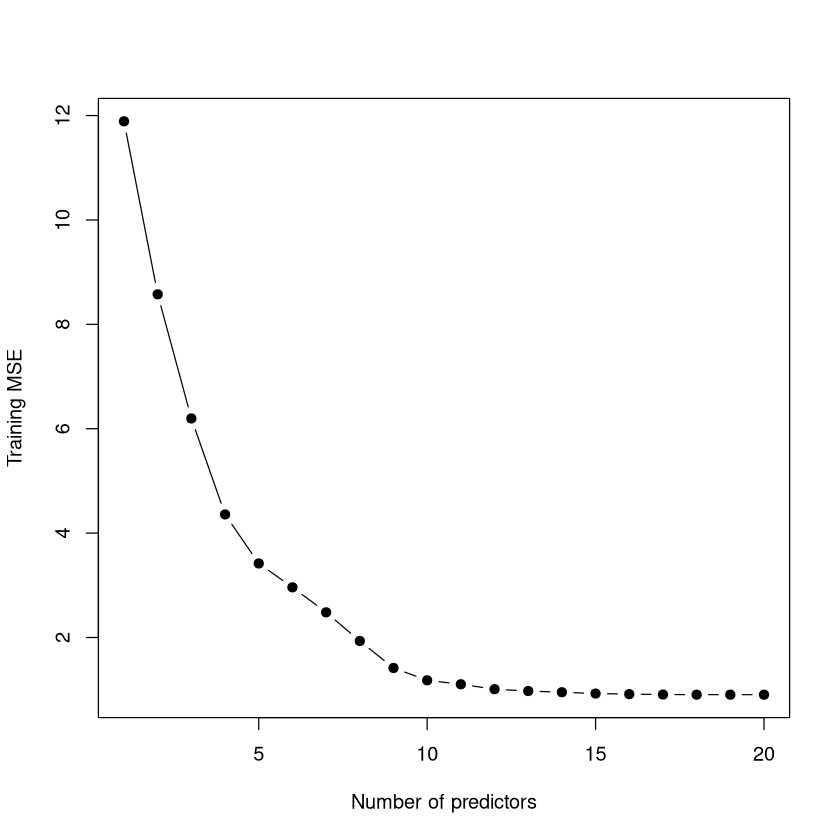

In [58]:
require(leaps)
df <- data.frame(y = y[train], x = x[train,])
regfit.full <- regsubsets(y ~ ., data = df, nvmax = 20)
train.mat <- model.matrix(y ~ ., data = df, nvmax = 20)
val.errors <- rep(NA, 20)
for (i in 1:20) {
    coefi <- coef(regfit.full, id = i)
    pred <- train.mat[, names(coefi)] %*% coefi
    val.errors[i] <- mean((pred - y.train)^2)
}
plot(val.errors, xlab = "Number of predictors", ylab = "Training MSE", pch = 19, type = "b")

### Part D
Plot the test set MSE associated with the best model of each size.

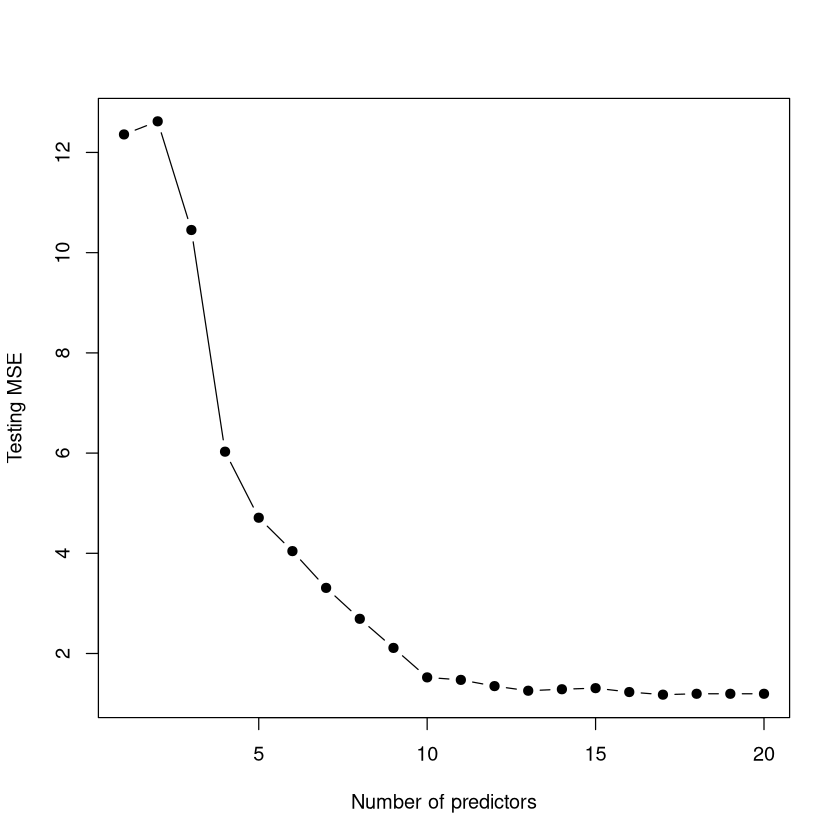

In [61]:
df <- data.frame(y = y.test, x = x.test)
test.mat <- model.matrix(y ~ ., data = df, nvmax = 20)
val.errors <- rep(NA, 20)
for (i in 1:20) {
    coefi <- coef(regfit.full, id = i)
    pred <- test.mat[,names(coefi)] %*% coefi
    val.errors[i] <- mean((pred - y.test)^2)
}
plot(val.errors, xlab = "Number of predictors", ylab = "Testing MSE", pch = 19, type = "b")

### Part E
For which model size does the test set MSE take on its minimum value? Comment on your results. If it takes on its minimum value for a model containing only an intercept or a model containing all of the features, then play around with the way that you are generating the data in (a) until you come up with a scenario in which the test set MSE is minimized for an intermediate model size.

In [62]:
which.min(val.errors)

[1] 17

### Part F
How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values.

In [65]:
coef(regfit.full, which.min(val.errors))

(Intercept)         x.1         x.2         x.4         x.5         x.7 
 0.12511551  0.08924802  0.13491344 -1.93846047  1.10515370  0.16271042 
        x.8         x.9        x.11        x.12        x.13        x.14 
 0.84780920  2.11365473  0.79522787  0.13316001 -0.25800365 -0.82946855 
       x.15        x.16        x.17        x.18        x.19        x.20 
-0.54038080 -0.23886055  0.28986573  1.68585184  0.82899300 -1.14318264

### Part G
Create a plot displaying $\sqrt{\sum^p_{j=1}(\beta_j - \hat{\beta^r_j})^2}$ for a range of values of $r$, where $\hat{\beta^r_j}$ is the _j_ th coefficient estimate for the best model containing $r$ coefficients. COmment on what you observe. How does this compare tot he test MSE plot from (d)?

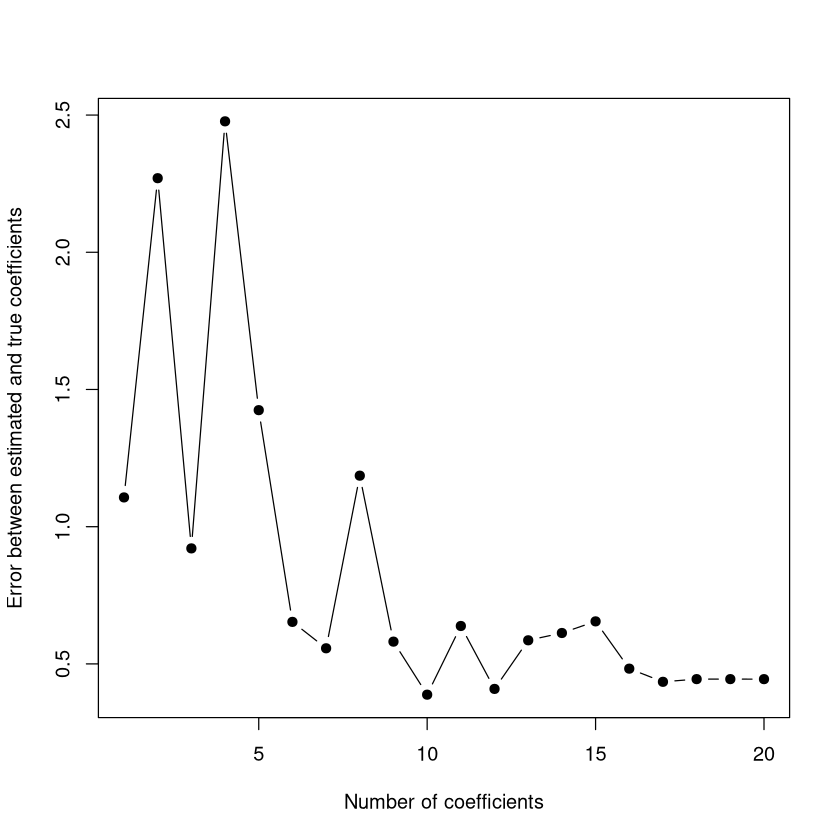

In [67]:
val.errors <- rep(NA, 20)
x_cols = colnames(x, do.NULL = FALSE, prefix = "x.")
for (i in 1:20) {
    coefi <- coef(regfit.full, id = i)
    val.errors[i] <- sqrt(sum((b[x_cols %in% names(coefi)] - coefi[names(coefi) %in% x_cols])^2) + sum(b[!(x_cols %in% names(coefi))])^2)
}
plot(val.errors, xlab = "Number of coefficients", ylab = "Error between estimated and true coefficients", pch = 19, type = "b")